In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.cluster import KMeans

In [2]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [3]:
url = 'https://raw.githubusercontent.com/kennedykwangari/Mall-Customer-Segmentation-Data/master/Mall_Customers.csv'
# Read the CSV file
df = pd.read_csv(url)

In [4]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.shape
#if we have low amount od datapoints how can we enlarge the present datapoints to train our model.

(200, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
#no null value
#gender has the dtype of object which needs to be taken acre off.

In [10]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [13]:
#avg age of customer is 38
#customer that visits the mall is having the age b/w 18 to 70
#having the avg annual income as $60k

<Axes: xlabel='Age', ylabel='count'>

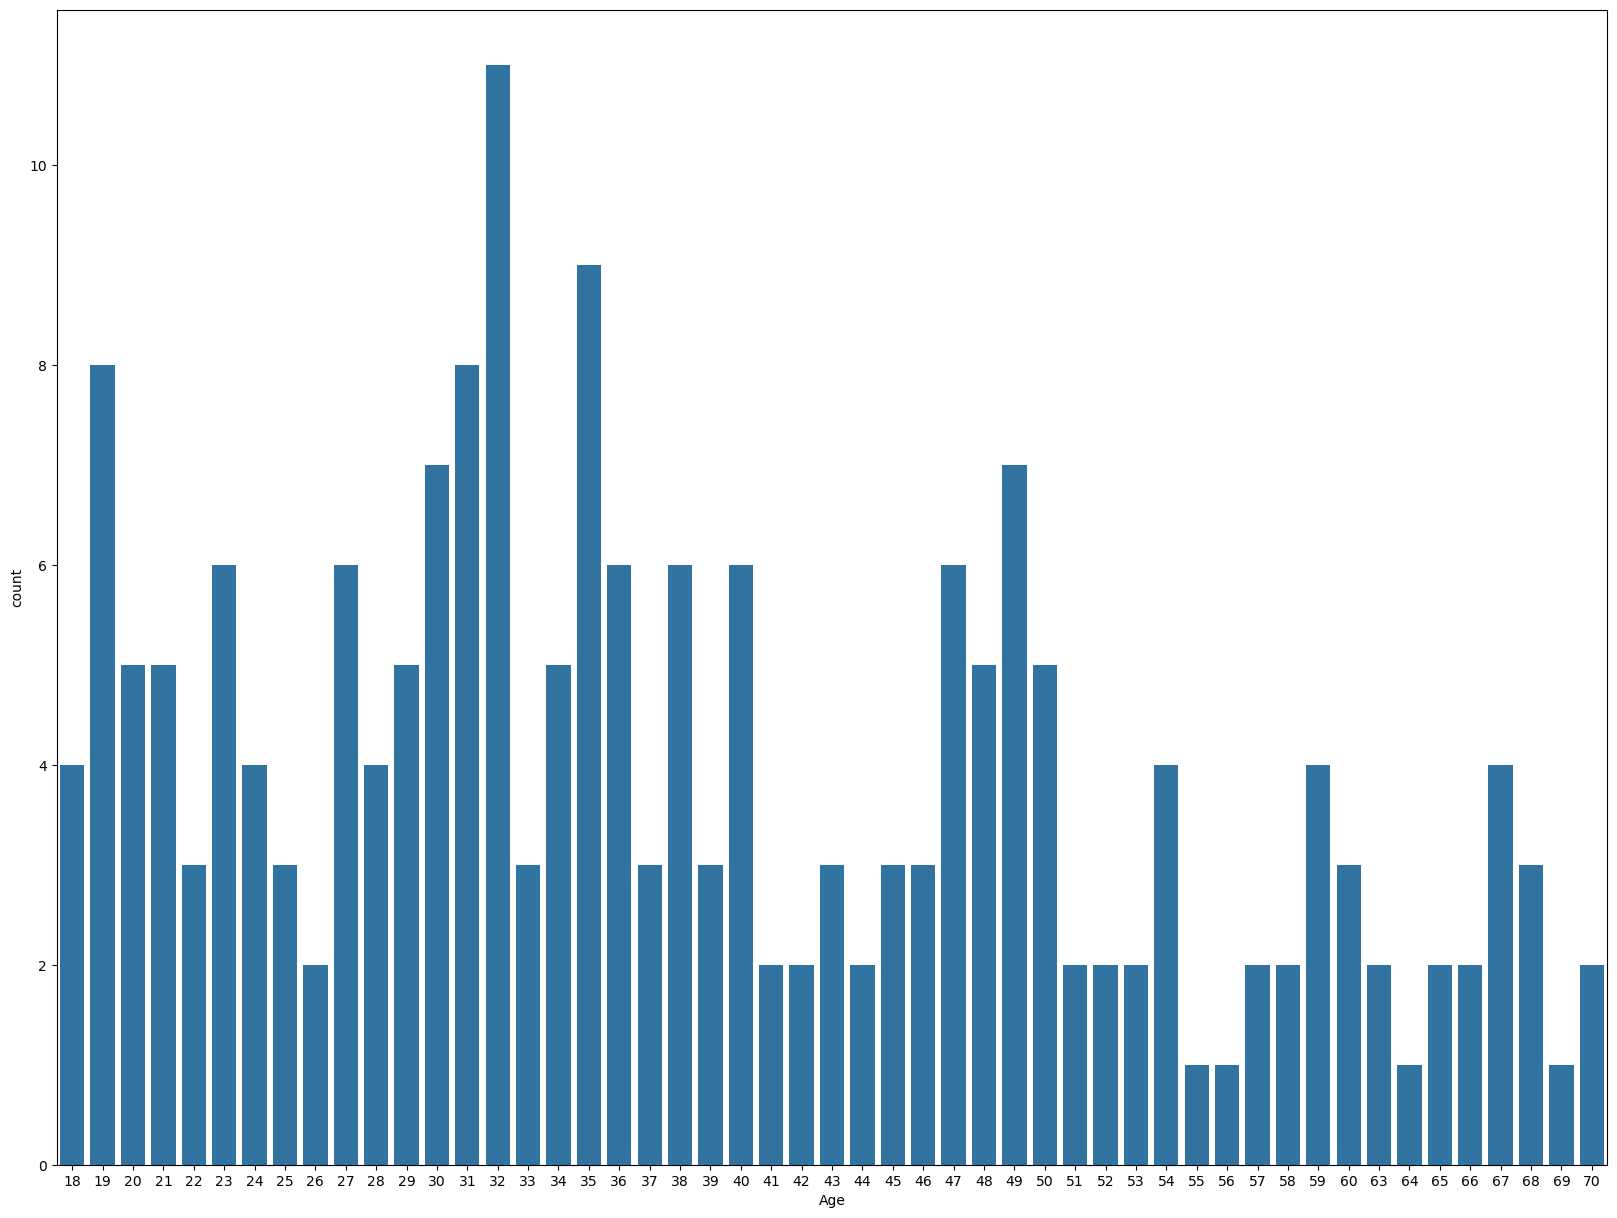

In [14]:
plt.figure(figsize=(20,15))
sns.countplot(data=df,x='Age')

In [15]:
#showing how many % of male and female visits the mall with the help of a plot.

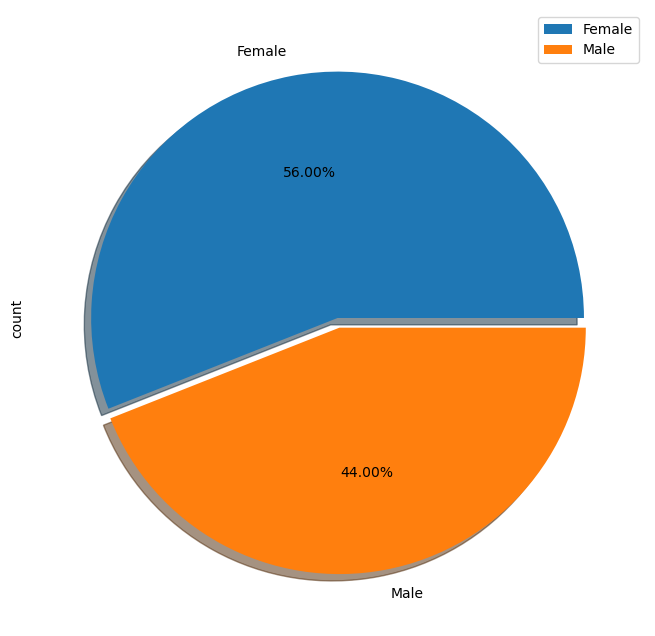

In [25]:
plt.figure(figsize=(8,8))
df.Gender.value_counts().plot(kind='pie',autopct='%.2f%%',shadow=True,explode=(0,0.04))
plt.legend()

In [26]:
#numbr of females > number of males
#females are 12% more than males
#female visits the mall most of the time

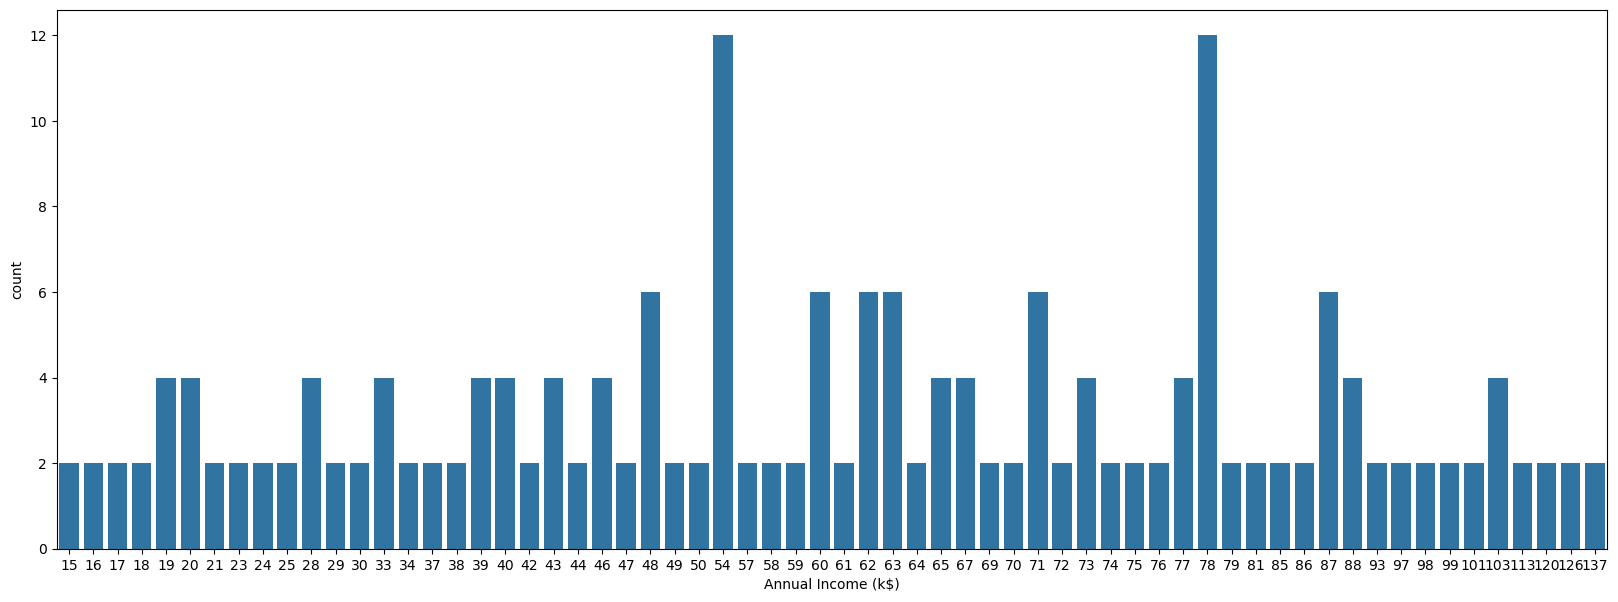

In [27]:
plt.figure(figsize=(20,7))
sns.countplot(x='Annual Income (k$)', data=df)  # Correct syntax
plt.show()

In [30]:
#customers that are having the salary of 54(k) and 78(k) visits the mall most of the time.

Text(0.5, 1.0, 'annual income distribution w.r.t to the gender')

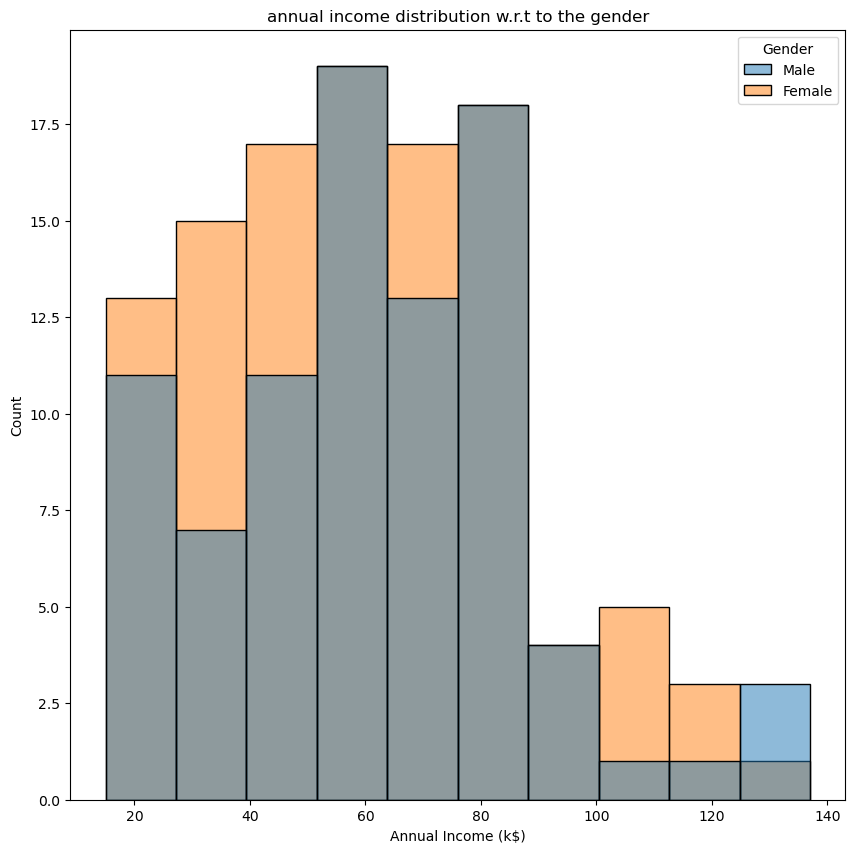

In [33]:
#showoing the annual income distribution w.r.t to the gender
plt.figure(figsize=(10,10))
sns.histplot(df,x='Annual Income (k$)',hue='Gender')
plt.title('annual income distribution w.r.t to the gender')

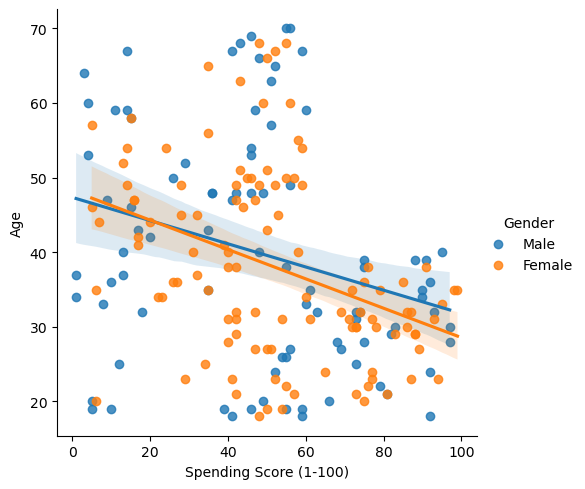

In [34]:
sns.lmplot(data=df, x='Spending Score (1-100)', y='Age', hue='Gender')
plt.show()

In [37]:
#label encoding
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df.Gender=enc.fit_transform(df.Gender)

In [39]:
df.drop('CustomerID',axis=1,inplace=True)

Clustering using K- means
ML model
Concept

K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.

Typically, unsupervised algorithms make inferences from datasets using only input vectors without referring to known, or labelled, outcomes.

A cluster refers to a collection of data points aggregated together because of certain similarities.

You’ll define a target number k, which refers to the number of centroids you need in the dataset. A centroid is the imaginary or real location representing the center of the cluster.

Every data point is allocated to each of the clusters through reducing the in-cluster sum of squares.

In other words, the K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible.

The ‘means’ in the K-means refers to averaging of the data; that is, finding the centroid.

How the K-means algorithm works

To process the learning data, the K-means algorithm in data mining starts with a first group of randomly selected centroids, which are used as the beginning points for every cluster, and then performs iterative (repetitive) calculations to optimize the positions of the centroids

It halts creating and optimizing clusters when either:

The centroids have stabilized — there is no change in their values because the clustering has been successful. The defined number of iterations has been achieved.

Optimal K: the elbow method

How many clusters would you choose ?

A common, empirical method, is the elbow method. You plot the mean distance of every point toward its cluster center, as a function of the number of clusters.

Sometimes the plot has an arm shape, and the elbow would be the optimal K.



Warning: this method does not apply all the time: sometimes you don't have a clear elbow! In any case, you have to check on the data how is the clustering and make sure it makes sense.

Application in this use-case
Let's perform clustering (optimizing K with the elbow method). In order to simplify the problem, we start by keeping only the two last columns as features.

In [62]:
X = df.iloc[:, -2:]

In [64]:
km_inertias, km_scores = [], []

for k in range(2, 11):
    km = KMeans(n_clusters=k).fit(X)
    km_inertias.append(km.inertia_)
    km_scores.append(silhouette_score(X, km.labels_))
    
sns.lineplot(range(2, 11), km_inertias)
plt.title('elbow graph / inertia depending on k')
plt.show()

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Wi

TypeError: lineplot() takes from 0 to 1 positional arguments but 2 were given

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Wi

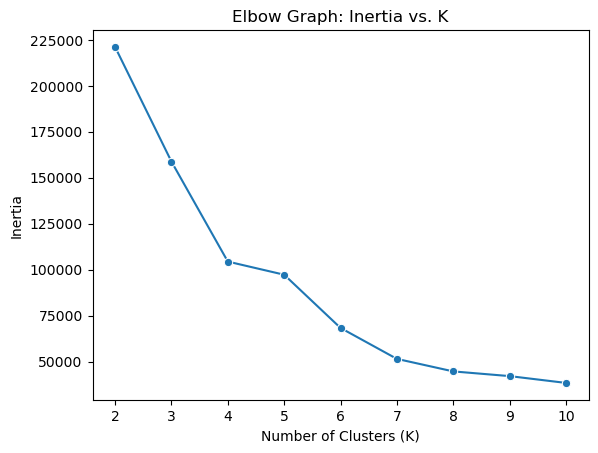

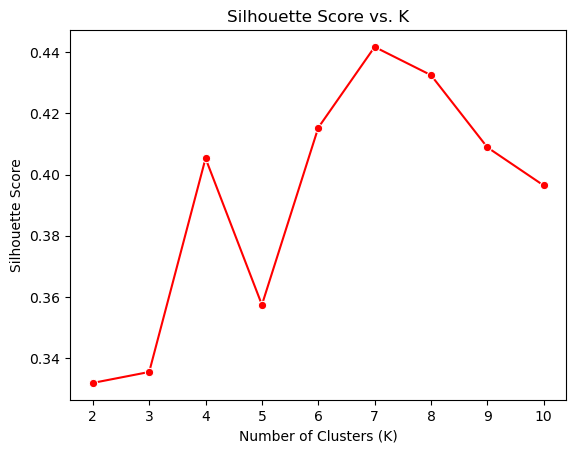

In [58]:
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])

# Select features for clustering
X = df[["Gender", "Age", "Annual Income (k$)", "Spending Score (1-100)"]]

# Store inertia and silhouette scores
km_inertias, km_scores = [], []

# Loop through k values from 2 to 10
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42).fit(X)
    km_inertias.append(km.inertia_)
    km_scores.append(silhouette_score(X, km.labels_))

# Plot Elbow method (Inertia)
sns.lineplot(x=range(2, 11), y=km_inertias, marker='o')
plt.title('Elbow Graph: Inertia vs. K')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()

# Plot Silhouette Score
sns.lineplot(x=range(2, 11), y=km_scores, marker='o', color="red")
plt.title('Silhouette Score vs. K')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()

In [54]:
from sklearn.metrics import silhouette_score

In [60]:
sns.lineplot(range(2, 11), km_scores)
plt.title('scores depending on k')
plt.show()

TypeError: lineplot() takes from 0 to 1 positional arguments but 2 were given

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Wi

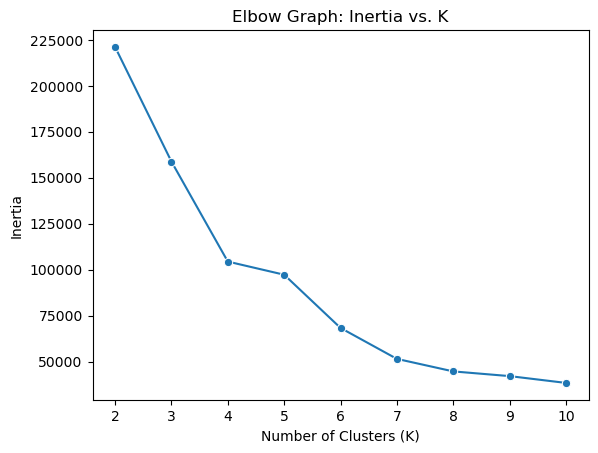

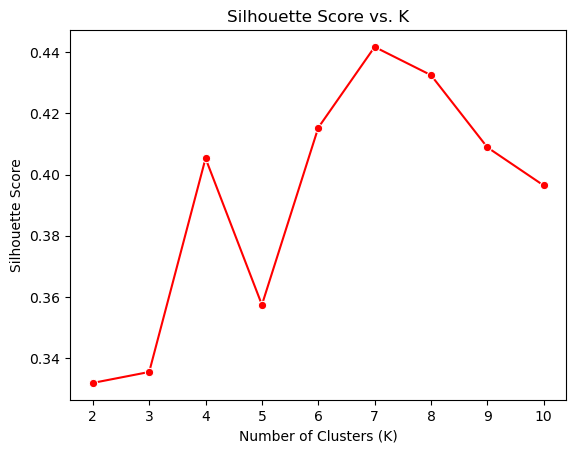

In [68]:
# Encode categorical "Gender" column
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])

# Select features for clustering
X = df[["Gender", "Age", "Annual Income (k$)", "Spending Score (1-100)"]]

# Store inertia and silhouette scores
km_inertias, km_scores = [], []

# Loop through k values from 2 to 10
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42).fit(X)
    km_inertias.append(km.inertia_)
    km_scores.append(silhouette_score(X, km.labels_))  # Ensure import of silhouette_score

# Plot Elbow Graph (Inertia)
sns.lineplot(x=range(2, 11), y=km_inertias, marker='o')
plt.title('Elbow Graph: Inertia vs. K')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()

# Plot Silhouette Score
sns.lineplot(x=range(2, 11), y=km_scores, marker='o', color="red")
plt.title('Silhouette Score vs. K')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Wi

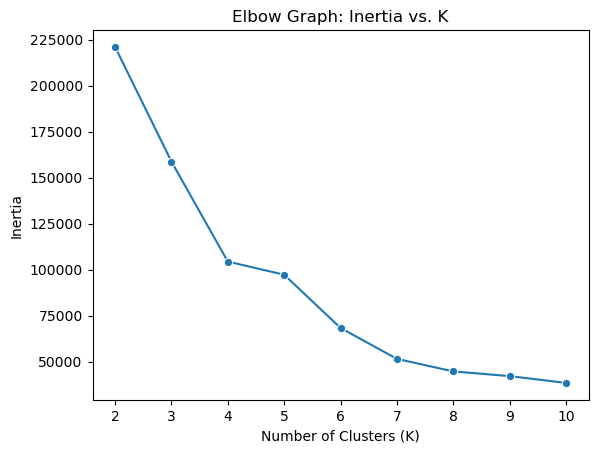

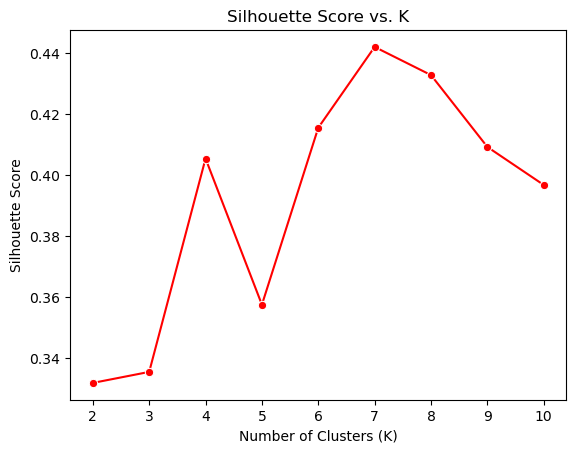

In [76]:
X = df.iloc[:, -3:]
km_inertias, km_scores = [], []

# Loop through k values from 2 to 10
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42).fit(X)
    km_inertias.append(km.inertia_)
    km_scores.append(silhouette_score(X, km.labels_))

# Plot Elbow Graph (Inertia)
sns.lineplot(x=range(2, 11), y=km_inertias, marker='o')
plt.title('Elbow Graph: Inertia vs. K')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()

# Plot Silhouette Score
sns.lineplot(x=range(2, 11), y=km_scores, marker='o', color="red")
plt.title('Silhouette Score vs. K')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()

In [78]:
X = df.iloc[:, -3:]

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Wi

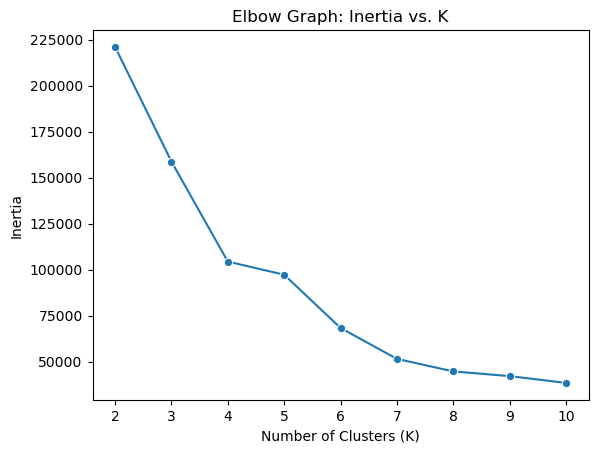

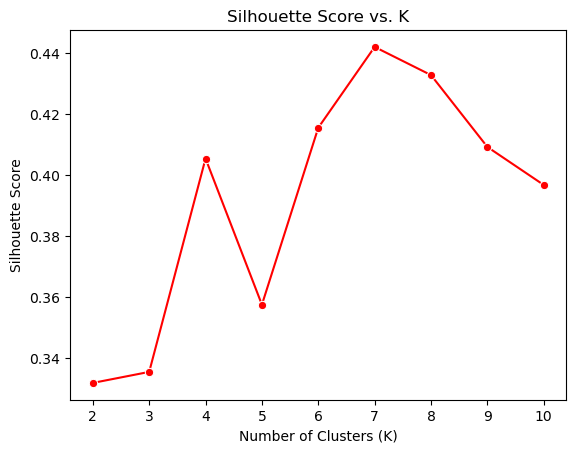

In [80]:
km_inertias, km_scores = [], []

# Loop through k values from 2 to 10
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42).fit(X)
    km_inertias.append(km.inertia_)
    km_scores.append(silhouette_score(X, km.labels_))

# Plot Elbow Graph (Inertia)
sns.lineplot(x=range(2, 11), y=km_inertias, marker='o')
plt.title('Elbow Graph: Inertia vs. K')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()

# Plot Silhouette Score
sns.lineplot(x=range(2, 11), y=km_scores, marker='o', color="red")
plt.title('Silhouette Score vs. K')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()

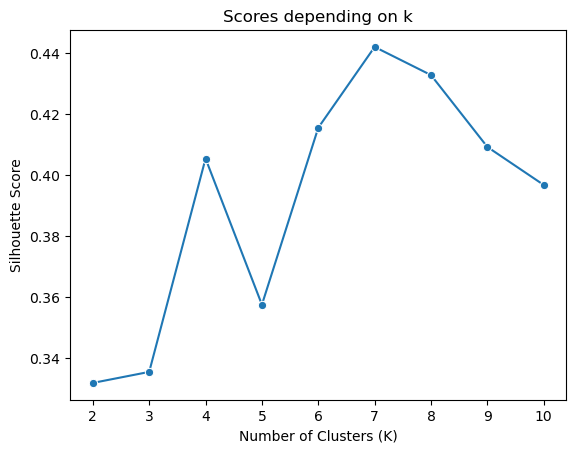

In [84]:
sns.lineplot(x=range(2, 11), y=km_scores, marker='o')
plt.title('Scores depending on k')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()

In [86]:
km = KMeans(n_clusters=5).fit(X)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


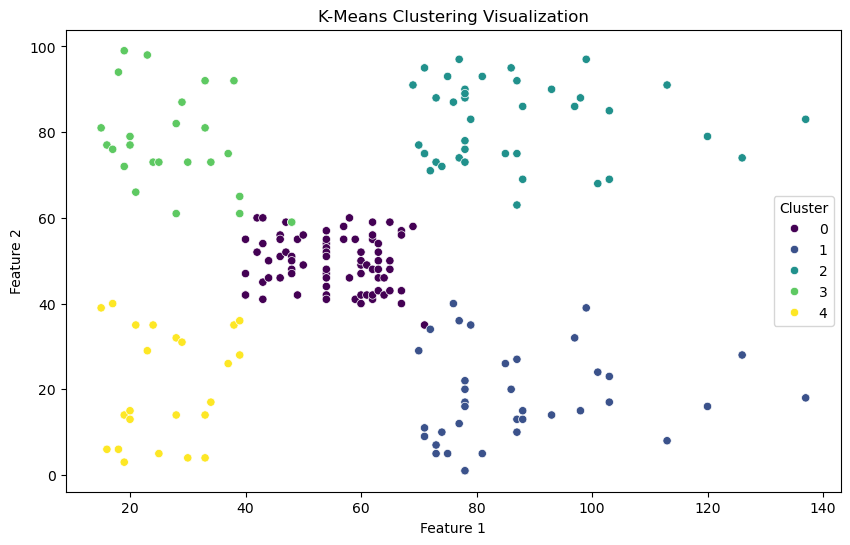

In [90]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X.iloc[:, 1], y=X.iloc[:, 2], hue=km.labels_, palette="viridis")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("K-Means Clustering Visualization")
plt.legend(title="Cluster")
plt.show()

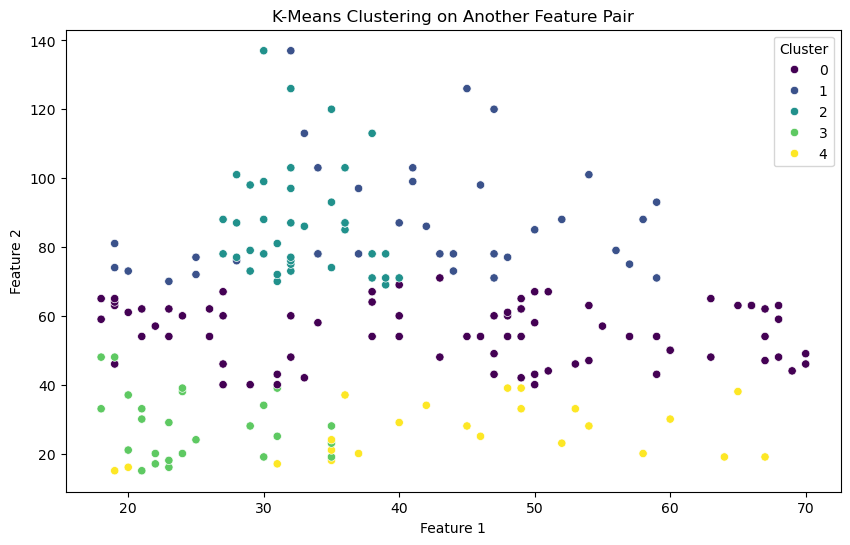

In [92]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=km.labels_, palette="viridis")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("K-Means Clustering on Another Feature Pair")
plt.legend(title="Cluster")
plt.show()

Visualization of the clusters in a 3D scatter plot.

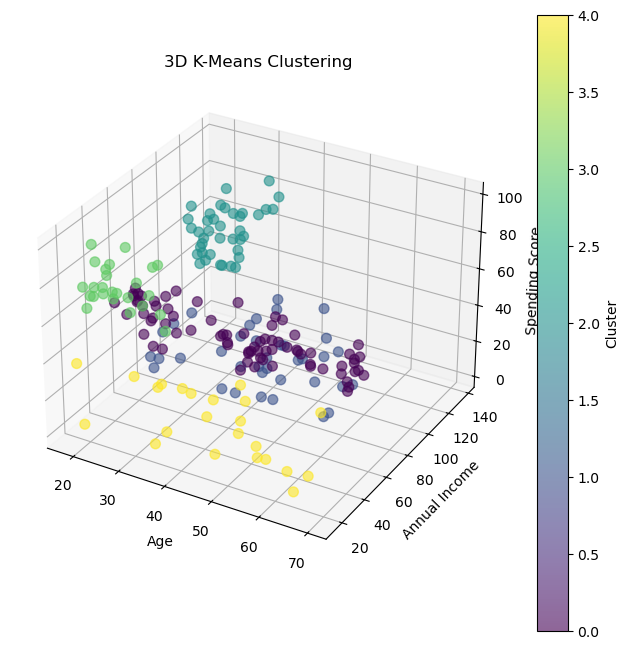

In [94]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')  # Correct way to create a 3D plot

xs = X.iloc[:, 0]
ys = X.iloc[:, 1]
zs = X.iloc[:, 2]

scatter = ax.scatter(xs, ys, zs, s=50, alpha=0.6, c=km.labels_, cmap="viridis")

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')

plt.colorbar(scatter, ax=ax, label="Cluster")  # Adds color legend
plt.title("3D K-Means Clustering")
plt.show()

This Clustering Analysis gives us a very clear insight about the different segments of the customers in the Mall. There are clearly 5 segments of Customers based on their Annual Income and Spending Score which are reportedly the best factors/attributes to determine the segments of a customer in a Mall.

Definition of customers profiles corresponding to each clusters

In [96]:
# Profiles of customers
X['label'] = km.labels_

In [98]:
X.label.value_counts()

label
0    76
2    39
1    37
3    25
4    23
Name: count, dtype: int64

In [100]:
for k in range(5):
    print(f'cluster nb : {k}')
    print(X[X.label == k].describe().iloc[[0, 1, 3, 7], :-1])
    print('\n\n')

cluster nb : 0
             Age  Annual Income (k$)  Spending Score (1-100)
count  76.000000           76.000000               76.000000
mean   43.934211           55.210526               49.447368
min    18.000000           40.000000               35.000000
max    70.000000           71.000000               60.000000



cluster nb : 1
             Age  Annual Income (k$)  Spending Score (1-100)
count  37.000000           37.000000               37.000000
mean   40.324324           87.432432               18.189189
min    19.000000           70.000000                1.000000
max    59.000000          137.000000               40.000000



cluster nb : 2
             Age  Annual Income (k$)  Spending Score (1-100)
count  39.000000           39.000000               39.000000
mean   32.692308           86.538462               82.128205
min    27.000000           69.000000               63.000000
max    40.000000          137.000000               97.000000



cluster nb : 3
         Age  An

In [112]:
X['label'] = km.labels_
X[X['label'] == 1].describe().iloc[[0, 1, 3, 7], :-1]


,Age,Annual Income (k$),Spending Score (1-100)
count,37.000000,37.000000,37.000000
mean,40.324324,87.432432,18.189189
min,19.000000,70.000000,1.000000
max,59.000000,137.000000,40.000000


The generated "Clusters of Customers" plot shows the distribution of the 5 clusters. A sensible interpretation for the mall customer segments can be:

Cluster 1. Customers with medium annual income and medium annual spend
Cluster 2. Customers with high annual income and high annual spend
Cluster 3. Customers with low annual income and low annual spend
Cluster 4. Customers with high annual income but low annual spend
Cluster 5. Customers low annual income but high annual spend
Having a better understanding of the customers segments, a company could make better and more informed decisions. An example, there are customers with high annual income but low spending score. A more strategic and targeted marketing approach could lift their interest and make them become higher spenders. The focus should also be on the "loyal" customers and maintain their satisfaction.

We have thus seen, how we could arrive at meaningful insights and recommendations by using clustering algorithms to generate customer segments. For the sake of simplicity, the dataset used only 2 variables — income and spend. In a typical business scenario, there could be several variables which could possibly generate much more realistic and business-specific insights.